In [1]:
import os
import cv2
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import KernelPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [2]:
# Function to load the MSTAR dataset and resizes to 128 * 128
def get_MSTAR(train_dir, test_dir):
    def load_images_from_folder(folder):
        images = []
        labels = []
        for label in os.listdir(folder):
            label_folder = os.path.join(folder, label)
            if os.path.isdir(label_folder):
                for filename in os.listdir(label_folder):
                    img_path = os.path.join(label_folder, filename)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img is not None:
                        # Resize image to 128x128
                        img_resized = cv2.resize(img, (128, 128))
                        images.append(img_resized)
                        labels.append(label)
        return images, labels

    X_train, y_train = load_images_from_folder(train_dir)
    X_test, y_test = load_images_from_folder(test_dir)
    
    # Convert lists to numpy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    return X_train, y_train, X_test, y_test


In [3]:
# Function to display trained and tested sets
def display_class_counts(y_train, y_test):
    train_counts = Counter(y_train)
    test_counts = Counter(y_test)
    classes = sorted(set(train_counts.keys()).union(set(test_counts.keys())))
    print(f"{'Class':<10} {'Train Count':<12} {'Test Count':<10}")
    print("="*32)
    for cls in classes:
        train_count = train_counts.get(cls, 0)
        test_count = test_counts.get(cls, 0)
        print(f"{cls:<10} {train_count:<12} {test_count:<10}")


In [4]:
# Path to the training and testing datasets
train_dir = '/home/nathan/Documents/EEE4022S/New/DATASET/TRAIN'
test_dir = '/home/nathan/Documents/EEE4022S/New/DATASET/TEST'

In [5]:
# Dataset loading
X_train, y_train, X_test, y_test = get_MSTAR(train_dir, test_dir)
display_class_counts(y_train, y_test)


Class      Train Count  Test Count
2S1        290          270       
BRDM_2     290          270       
BTR_60     256          195       
D7         290          270       
SLICY      290          270       
T62        290          270       
ZIL131     290          270       
ZSU_23_4   290          270       


In [6]:
def flatten_images(images):
    return np.array([img.flatten() for img in images])

X_train_flat = flatten_images(X_train)
X_test_flat = flatten_images(X_test)


In [7]:
# Standardize data
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

In [8]:
def plot_kpca_explained_variance(kpca):
    plt.figure(figsize=(8, 4))
    plt.plot(np.cumsum(kpca.eigenvalues_ / np.sum(kpca.eigenvalues_)))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Explained Variance Ratio (KPCA)')
    plt.grid(True)
    plt.show()

def plot_scree(kpca):
    plt.figure(figsize=(8, 4))
    plt.plot(kpca.eigenvalues_, marker='o', linestyle='--')
    plt.xlabel('Component')
    plt.ylabel('Eigenvalue')
    plt.title('Scree Plot (KPCA)')
    plt.grid(True)
    plt.show()

def plot_biplot(X, labels):
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.xlabel('KPCA 1')
    plt.ylabel('KPCA 2')
    plt.title('KPCA Biplot')
    plt.grid(True)
    plt.show()


In [9]:
# Apply Kernel PCA with Gaussian (RBF) kernel
kpca = KernelPCA(n_components=20, kernel='rbf', gamma=0.1, random_state=42)
X_train_kpca = kpca.fit_transform(X_train_flat)
X_test_kpca = kpca.transform(X_test_flat)

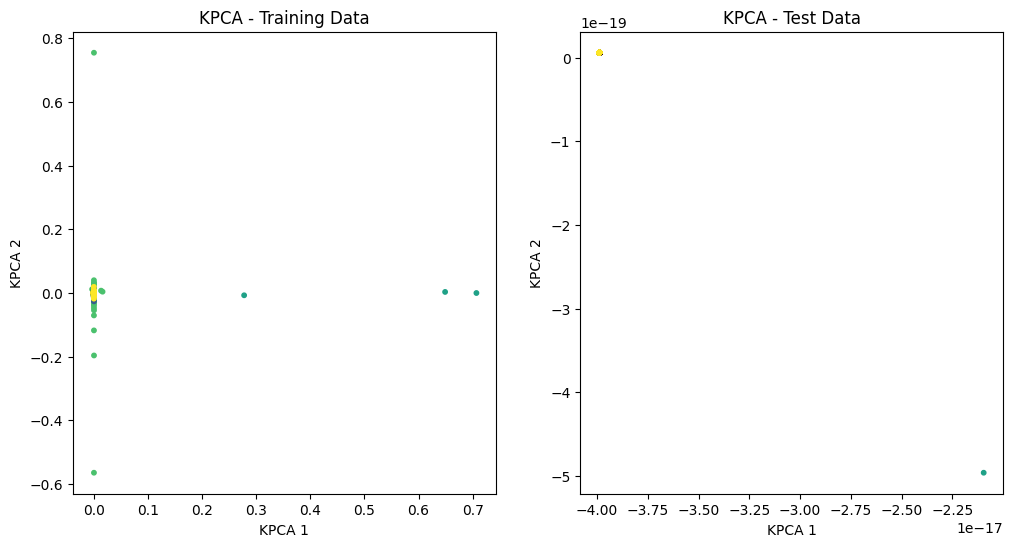

In [10]:
# Plot KPCA results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_kpca[:, 0], X_train_kpca[:, 1], c=LabelEncoder().fit_transform(y_train), cmap='viridis', s=10)
plt.title('KPCA - Training Data')
plt.xlabel('KPCA 1')
plt.ylabel('KPCA 2')
plt.subplot(1, 2, 2)
plt.scatter(X_test_kpca[:, 0], X_test_kpca[:, 1], c=LabelEncoder().fit_transform(y_test), cmap='viridis', s=10)
plt.title('KPCA - Test Data')
plt.xlabel('KPCA 1')
plt.ylabel('KPCA 2')
plt.show()

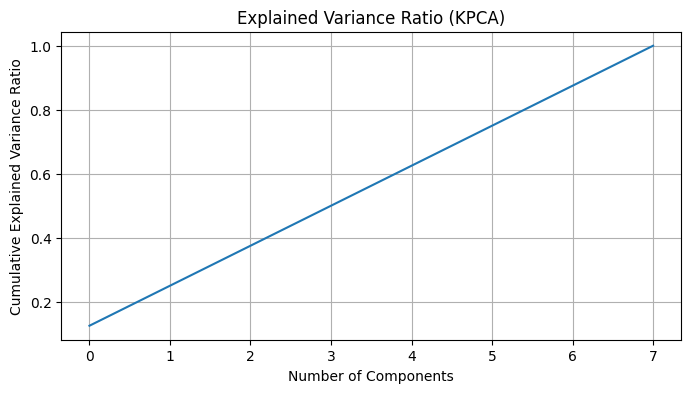

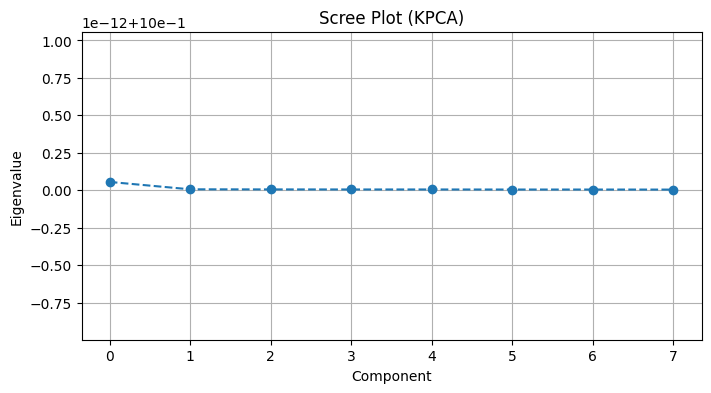

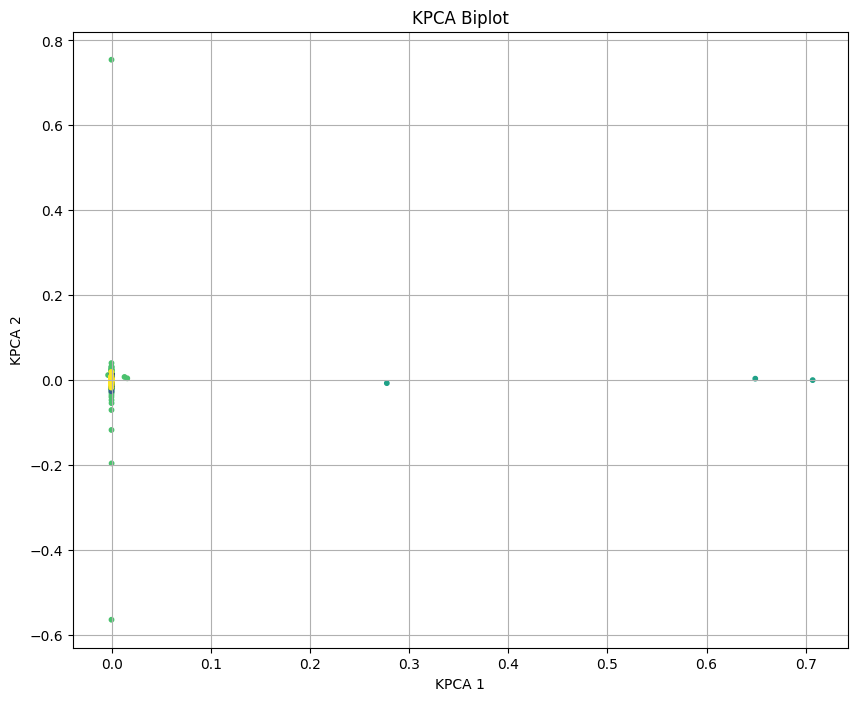

In [11]:
# Additional plots
plot_kpca_explained_variance(kpca)
plot_scree(kpca)
plot_biplot(X_train_kpca, LabelEncoder().fit_transform(y_train))

/home/nathan/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nathan/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nathan/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Classification Report:
              precision    recall  f1-score   support

         2S1       0.00      0.00      0.00       270
      BRDM_2       0.13      1.00      0.23       270
      BTR_60       0.00      0.00      0.00       195
          D7       0.00      0.00      0.00       270
       SLICY       0.00      0.00      0.00       270
         T62       0.00      0.00      0.00       270
      ZIL131       0.00      0.00      0.00       270
    ZSU_23_4       0.00      0.00      0.00       270

    accuracy                           0.13      2085
   macro avg       0.02      0.12      0.03      2085
weighted avg       0.02      0.13      0.03      2085

Accuracy: 0.13
Precision: 0.02
Recall: 0.13
F1 Score: 0.03


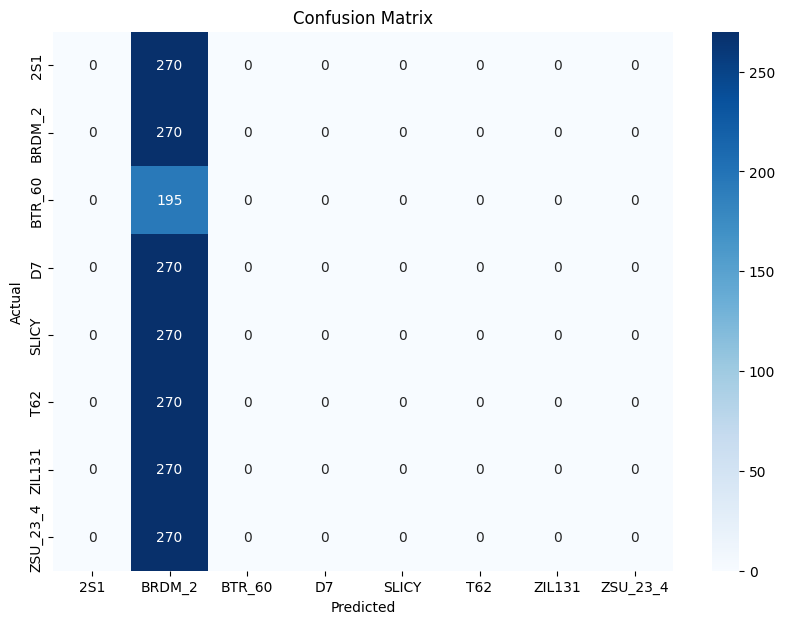

In [12]:
# Train a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_kpca, y_train)
y_pred = knn.predict(X_test_kpca)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=np.unique(y_test)))

# Print individual metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()